## Time series Forecasting

### dataset links : 
   - Retail Sales Forecasting https://www.ons.gov.uk/businessindustryandtrade/retailindustry/datasets/poundsdatatotalretailsales


In [33]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import datetime
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
data = pd.read_csv("valNSAT.csv")

In [4]:
data.head(1)

,Time_Period,All_retailing_including_automotive_fuel,Month_as_a_%_of_Total,All_Retailing_excluding_automotive_fuel,Month_as_a_%_of_Total_excluding_automotive_fuel,Predominantly_food_stores,Total_non-food_stores,Non-specialised_stores,"Textile,_clothing_and_footwear_stores",Household_goods_stores,Other_stores,Non-store_retailing,Automotive_fuel,Total_Annual_Sales_for_All_Retailing_including_automotive_fuel,Total_Annual_Sales_for_All_Retailing_excluding_automotive_fuel
0,1986JAN,NaN,NaN,9415792.0,8.53,3737172.0,4873175.0,818539.0,1338872.0,1307268.0,1408496.0,805445.0,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449 entries, 0 to 448
Data columns (total 15 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Time_Period                                                     449 non-null    object 
 1   All_retailing_including_automotive_fuel                         329 non-null    float64
 2   Month_as_a_%_of_Total                                           324 non-null    float64
 3   All_Retailing_excluding_automotive_fuel                         449 non-null    float64
 4   Month_as_a_%_of_Total_excluding_automotive_fuel                 444 non-null    float64
 5   Predominantly_food_stores                                       449 non-null    float64
 6   Total_non-food_stores                                           449 non-null    float64
 7   Non-specialised_stores                               

In [6]:
#change in time stamp to a datetime format
data['ds'] = pd.to_datetime(data['Time_Period'], format="%Y%b")

#making ds column as first column
cols = [data.columns[-1]] + [col for col in data if col != data.columns[-1]]
data = data[cols]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449 entries, 0 to 448
Data columns (total 16 columns):
 #   Column                                                          Non-Null Count  Dtype         
---  ------                                                          --------------  -----         
 0   ds                                                              449 non-null    datetime64[ns]
 1   Time_Period                                                     449 non-null    object        
 2   All_retailing_including_automotive_fuel                         329 non-null    float64       
 3   Month_as_a_%_of_Total                                           324 non-null    float64       
 4   All_Retailing_excluding_automotive_fuel                         449 non-null    float64       
 5   Month_as_a_%_of_Total_excluding_automotive_fuel                 444 non-null    float64       
 6   Predominantly_food_stores                                       449 non-null    float64   

In [8]:
data.columns

Index(['ds', 'Time_Period', 'All_retailing_including_automotive_fuel',
       'Month_as_a_%_of_Total', 'All_Retailing_excluding_automotive_fuel',
       'Month_as_a_%_of_Total_excluding_automotive_fuel',
       'Predominantly_food_stores', 'Total_non-food_stores',
       'Non-specialised_stores', 'Textile,_clothing_and_footwear_stores',
       'Household_goods_stores', 'Other_stores', 'Non-store_retailing',
       'Automotive_fuel',
       'Total_Annual_Sales_for_All_Retailing_including_automotive_fuel',
       'Total_Annual_Sales_for_All_Retailing_excluding_automotive_fuel'],
      dtype='object')

In [9]:
# checking for null values
for x in data.columns:
    nulls = data[x].isnull().sum()
    print(f"{x}============>{nulls}")

ds============>0
Time_Period============>0
All_retailing_including_automotive_fuel============>120
Month_as_a_%_of_Total============>125
All_Retailing_excluding_automotive_fuel============>0
Month_as_a_%_of_Total_excluding_automotive_fuel============>5
Predominantly_food_stores============>0
Total_non-food_stores============>0
Non-specialised_stores============>0
Textile,_clothing_and_footwear_stores============>0
Household_goods_stores============>0
Other_stores============>0
Non-store_retailing============>0
Automotive_fuel============>120
Total_Annual_Sales_for_All_Retailing_including_automotive_fuel============>386
Total_Annual_Sales_for_All_Retailing_excluding_automotive_fuel============>412


In [13]:
#filling nulls with previous available data
data = data.fillna(method='bfill')

In [15]:
#dropping columns that are not needed..
data.drop(columns=['Total_Annual_Sales_for_All_Retailing_including_automotive_fuel',
       'Total_Annual_Sales_for_All_Retailing_excluding_automotive_fuel'], inplace=True)

In [16]:
# making a list of columns with revenue values
value_cols = ['All_retailing_including_automotive_fuel',
        'All_Retailing_excluding_automotive_fuel',
       'Predominantly_food_stores', 'Total_non-food_stores',
       'Non-specialised_stores', 'Textile,_clothing_and_footwear_stores',
       'Household_goods_stores', 'Other_stores', 'Non-store_retailing',
       'Automotive_fuel']

In [13]:
# making revenue columns to float, and removing commas
for x in value_cols:
    data[x] = data[x].apply(lambda x : x.replace(",",""))
    data[x] = data[x].astype(float)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449 entries, 0 to 448
Data columns (total 14 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   ds                                               449 non-null    datetime64[ns]
 1   Time_Period                                      449 non-null    object        
 2   All_retailing_including_automotive_fuel          449 non-null    float64       
 3   Month_as_a_%_of_Total                            444 non-null    float64       
 4   All_Retailing_excluding_automotive_fuel          449 non-null    float64       
 5   Month_as_a_%_of_Total_excluding_automotive_fuel  444 non-null    float64       
 6   Predominantly_food_stores                        449 non-null    float64       
 7   Total_non-food_stores                            449 non-null    float64       
 8   Non-specialised_stores                  

In [15]:
data.head(2)

,ds,Time_Period,All_retailing_including_automotive_fuel,Month_as_a_%_of_Total,All_Retailing_excluding_automotive_fuel,Month_as_a_%_of_Total_excluding_automotive_fuel,Predominantly_food_stores,Total_non-food_stores,Non-specialised_stores,"Textile,_clothing_and_footwear_stores",Household_goods_stores,Other_stores,Non-store_retailing,Automotive_fuel
0,1986-01-01,1986JAN,17216871.0,8.36,9415792.0,8.53,3737172.0,4873175.0,818539.0,1338872.0,1307268.0,1408496.0,805445.0,1449928.0
1,1986-02-01,1986FEB,17216871.0,8.36,7279178.0,6.59,3092640.0,3592464.0,610626.0,895347.0,986007.0,1100484.0,594074.0,1449928.0


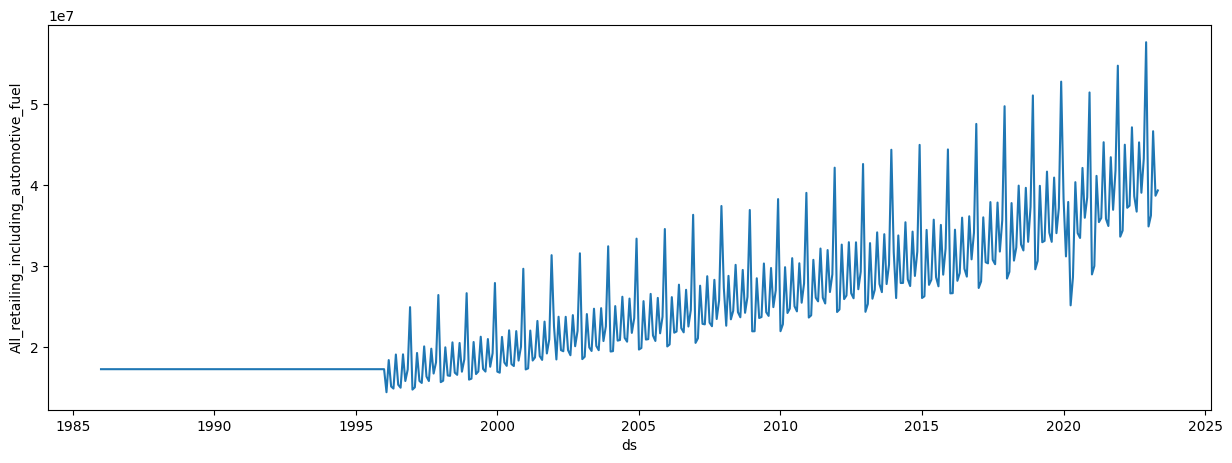

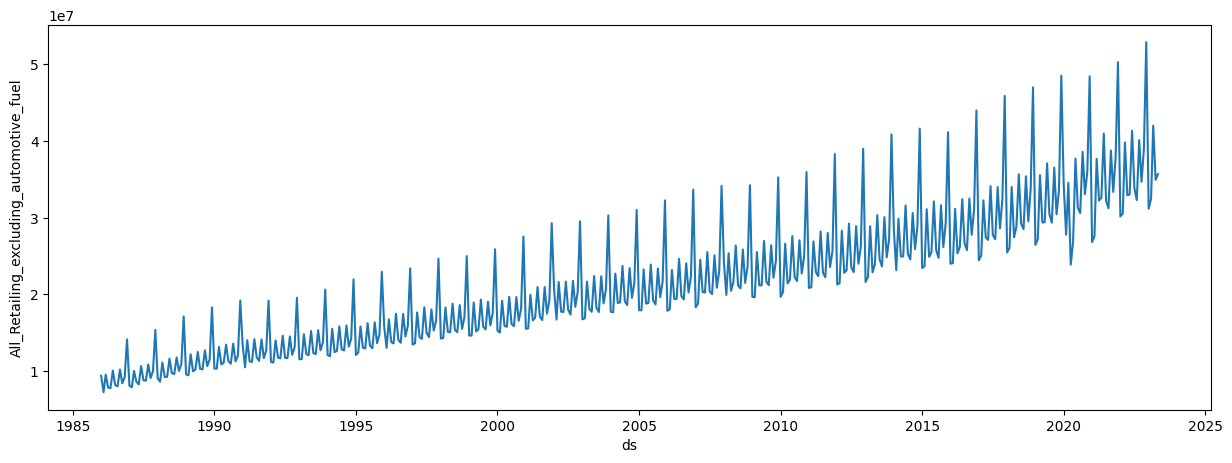

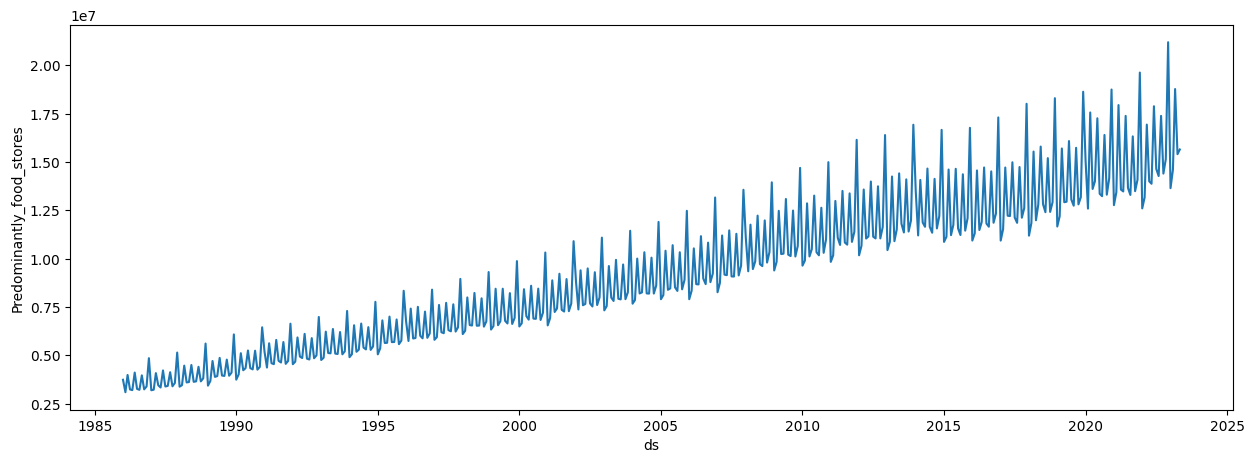

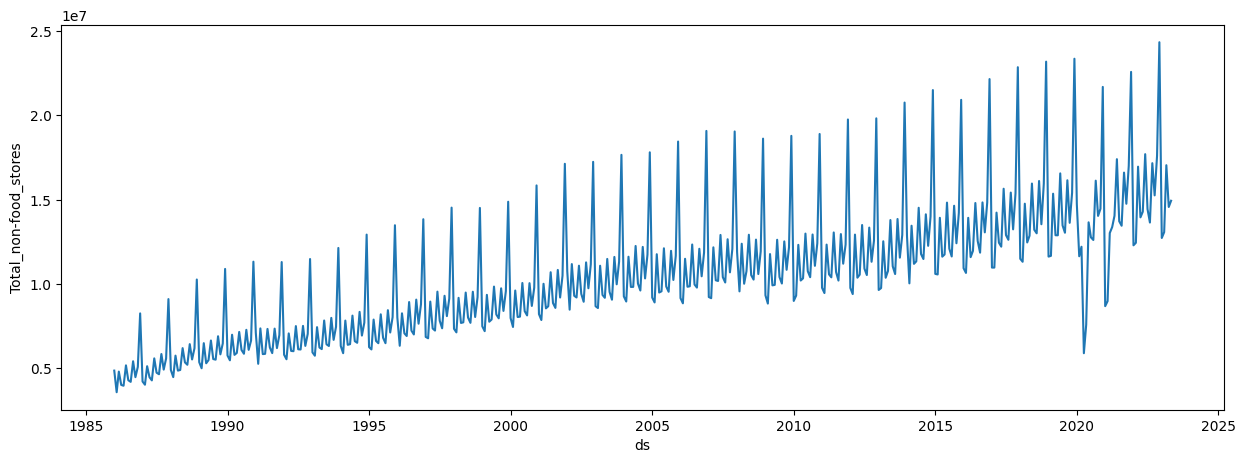

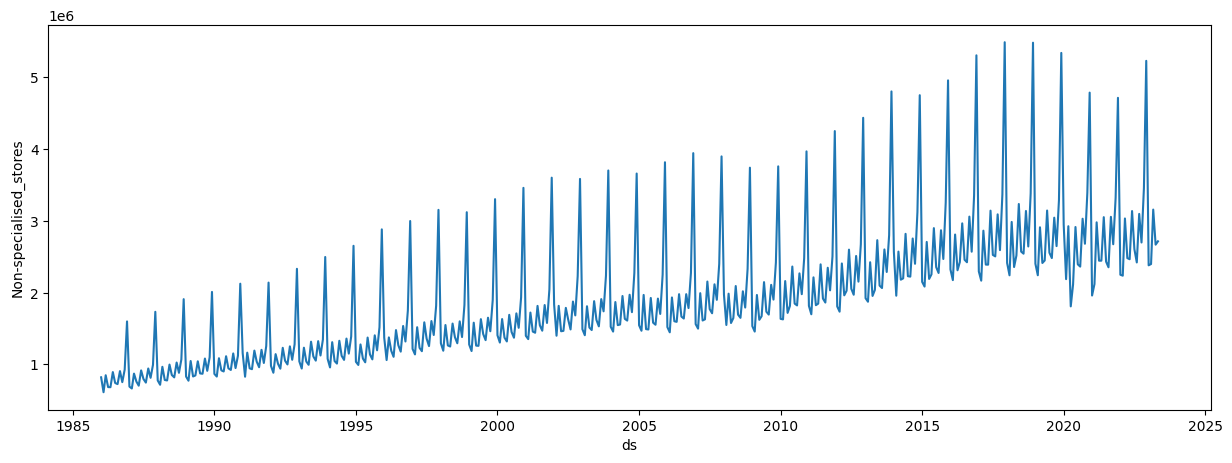

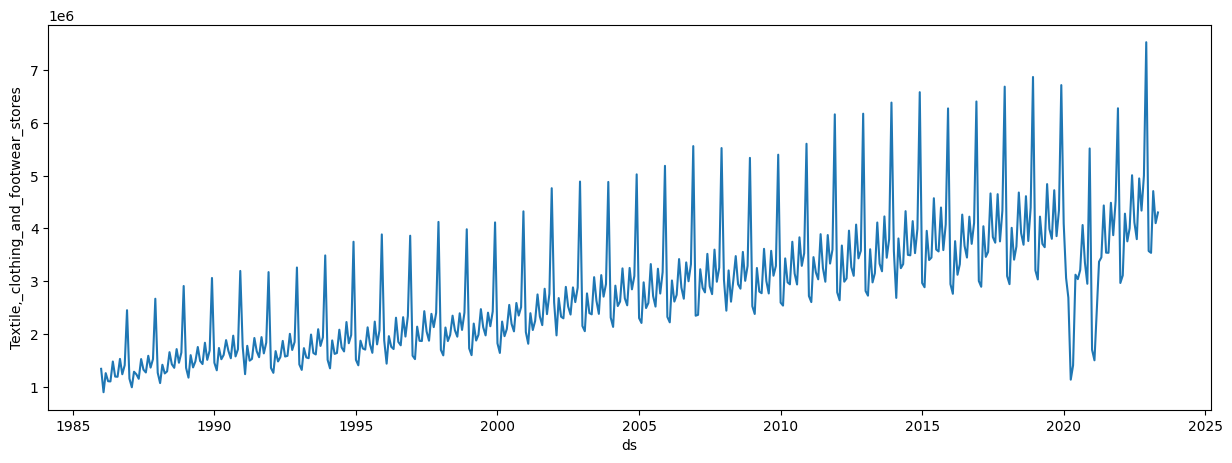

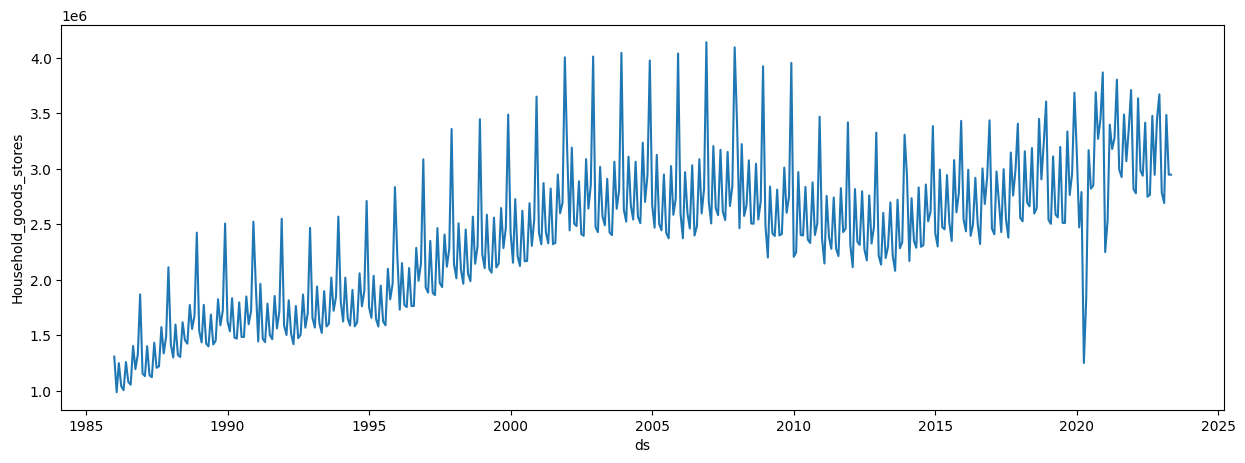

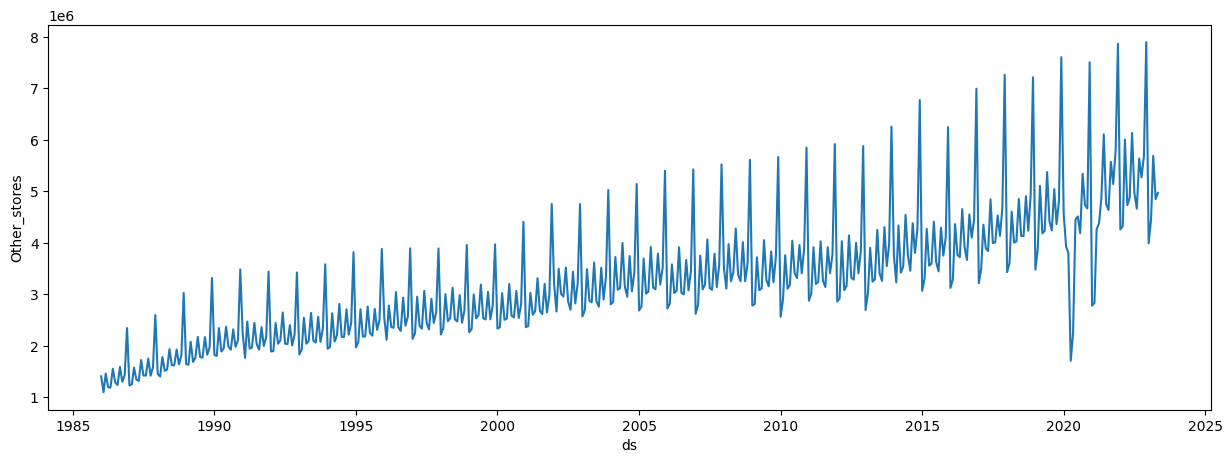

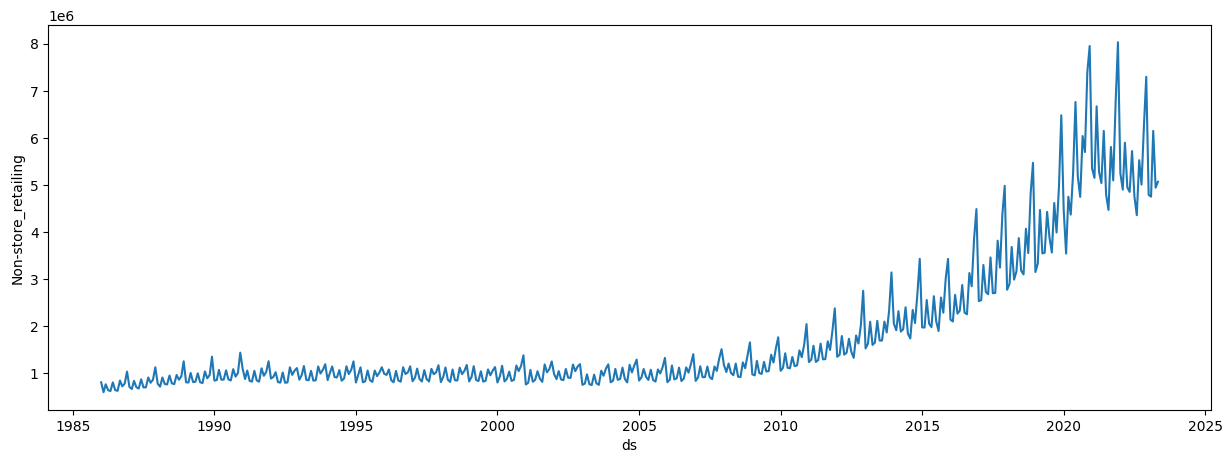

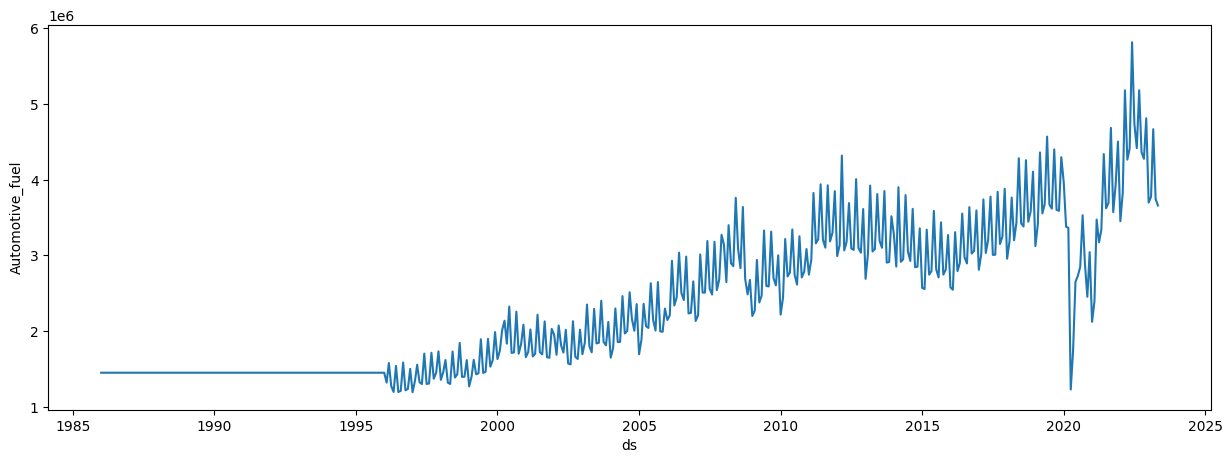

In [14]:
#plotting the values
for x in value_cols:
    plt.figure(figsize=[15,5])
    sns.lineplot(data.ds,data[x])
    plt.show()

In [42]:
data.head(2)

,ds,Time_Period,All_retailing_including_automotive_fuel,Month_as_a_%_of_Total,All_Retailing_excluding_automotive_fuel,Month_as_a_%_of_Total_excluding_automotive_fuel,Predominantly_food_stores,Total_non-food_stores,Non-specialised_stores,"Textile,_clothing_and_footwear_stores",Household_goods_stores,Other_stores,Non-store_retailing,Automotive_fuel
0,1986-01-01,1986JAN,17216871.0,8.36,9415792.0,8.53,3737172.0,4873175.0,818539.0,1338872.0,1307268.0,1408496.0,805445.0,1449928.0
1,1986-02-01,1986FEB,17216871.0,8.36,7279178.0,6.59,3092640.0,3592464.0,610626.0,895347.0,986007.0,1100484.0,594074.0,1449928.0


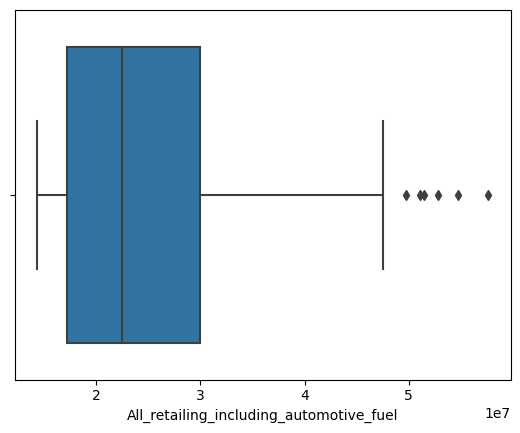

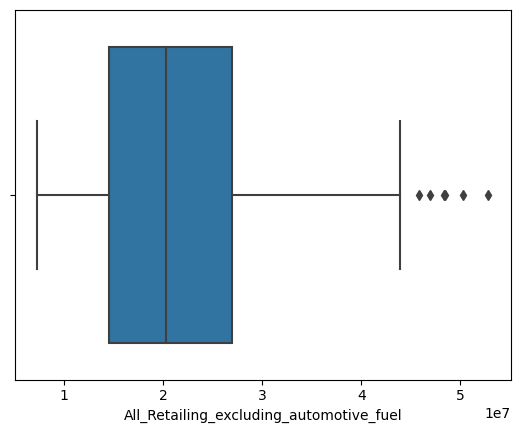

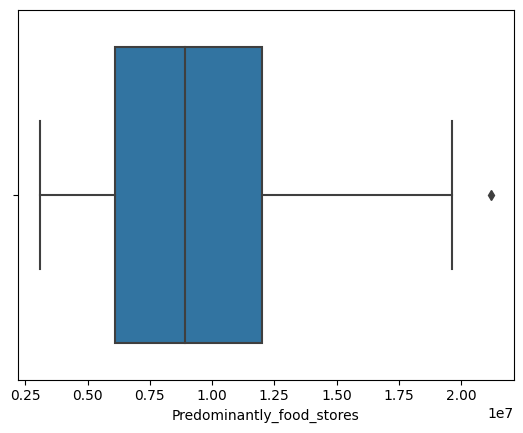

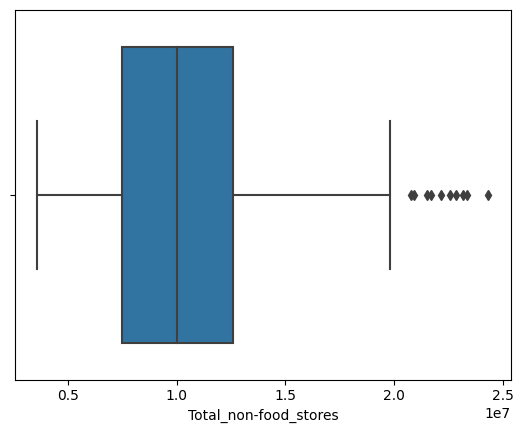

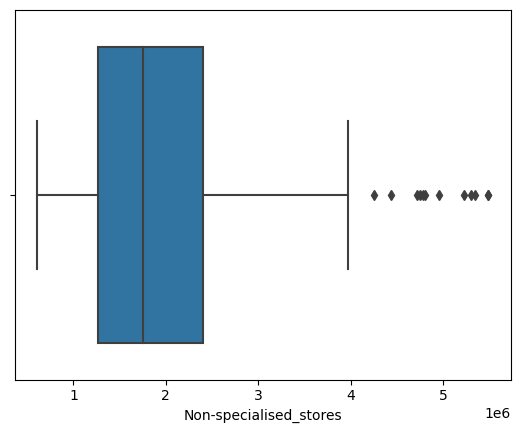

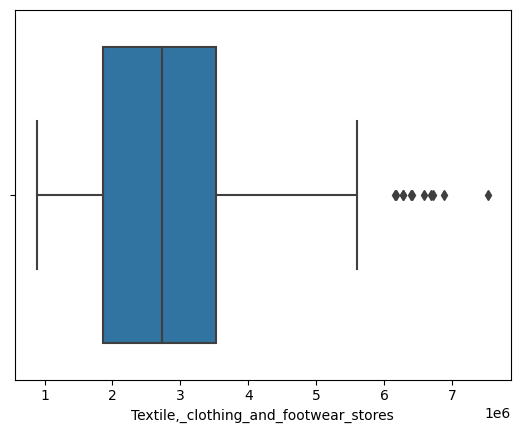

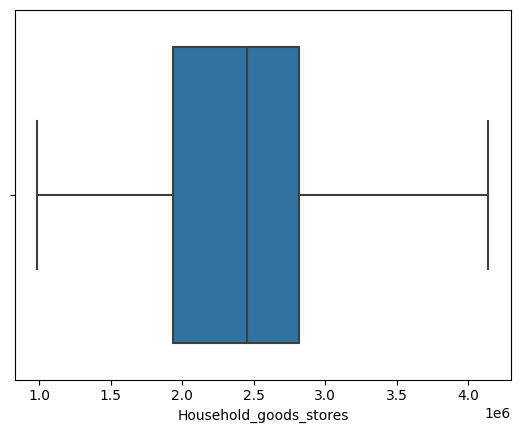

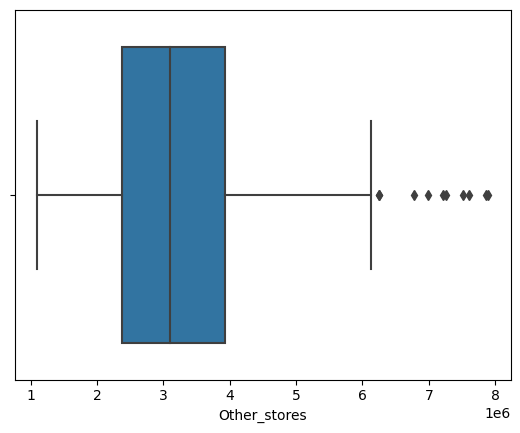

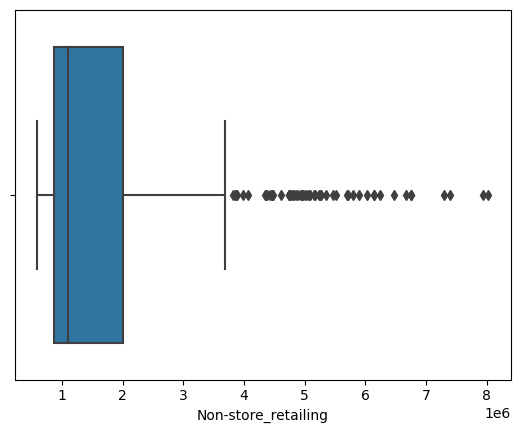

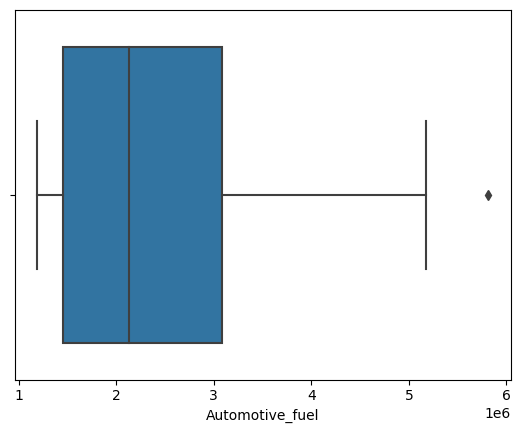

In [43]:
for col in value_cols:
    sns.boxplot(data = data, x=col)
    plt.show()